In [1]:
# load all of the audio files
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/speech-emotion-recognition-en/Savee/JE_h09.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_f12.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_h03.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_d04.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a14.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_h15.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_su02.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_a06.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_n01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_f01.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JK_n22.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_a10.wav
/kaggle/input/speech-emotion-recognition-en/Savee/JE_n08.wav
/kaggle/input/speech-emotion-recognition-en/Savee/KL_sa13.wav
/kaggle/input/speech-emotion-recognition-en/Savee/DC_a12.wav
/kaggle/input/speech-e

In [2]:
# import all of the necessary libraries
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

import warnings

In [3]:
# seperate all of the audio files into different path files
image_dir = Path('../input/speech-emotion-recognition-en/Tess')
image_dir1 = Path('../input/speech-emotion-recognition-en/Crema')
image_dir2 = Path('../input/speech-emotion-recognition-en/Savee')
image_dir3 = Path('../input/speech-emotion-recognition-en/Ravdess')

In [4]:
# create a dictionary with the file paths
audio_files = []
for path in [image_dir, image_dir1, image_dir2, image_dir3]:
    audio_files.extend(path.glob('**/*.wav'))

data = {'Path': [str(file) for file in audio_files]}

# create the dataframe
df = pd.DataFrame(data)

print(df)

                                                    Path
0      ../input/speech-emotion-recognition-en/Tess/YA...
1      ../input/speech-emotion-recognition-en/Tess/YA...
2      ../input/speech-emotion-recognition-en/Tess/YA...
3      ../input/speech-emotion-recognition-en/Tess/YA...
4      ../input/speech-emotion-recognition-en/Tess/YA...
...                                                  ...
12157  ../input/speech-emotion-recognition-en/Ravdess...
12158  ../input/speech-emotion-recognition-en/Ravdess...
12159  ../input/speech-emotion-recognition-en/Ravdess...
12160  ../input/speech-emotion-recognition-en/Ravdess...
12161  ../input/speech-emotion-recognition-en/Ravdess...

[12162 rows x 1 columns]


In [5]:
# extract the labels from the audio files
labels = []
for file in audio_files:
    file_parts = os.path.split(file)[1].split('_')
    if len(file_parts) >= 3:
        label = file_parts[2]
    else:
        label = 'unknown'
    labels.append(label)

In [6]:
# unique elements of the labels
set(labels)

{'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'angry.wav',
 'disgust.wav',
 'fear.wav',
 'happy.wav',
 'neutral.wav',
 'ps.wav',
 'sad.wav',
 'unknown'}

In [7]:
# create the new dataframe
data = {'Path': [str(file) for file in audio_files],
        'Label': labels}

df = pd.DataFrame(data)

print(df)

                                                    Path     Label
0      ../input/speech-emotion-recognition-en/Tess/YA...  fear.wav
1      ../input/speech-emotion-recognition-en/Tess/YA...  fear.wav
2      ../input/speech-emotion-recognition-en/Tess/YA...  fear.wav
3      ../input/speech-emotion-recognition-en/Tess/YA...  fear.wav
4      ../input/speech-emotion-recognition-en/Tess/YA...  fear.wav
...                                                  ...       ...
12157  ../input/speech-emotion-recognition-en/Ravdess...   unknown
12158  ../input/speech-emotion-recognition-en/Ravdess...   unknown
12159  ../input/speech-emotion-recognition-en/Ravdess...   unknown
12160  ../input/speech-emotion-recognition-en/Ravdess...   unknown
12161  ../input/speech-emotion-recognition-en/Ravdess...   unknown

[12162 rows x 2 columns]


<AxesSubplot:ylabel='Count'>

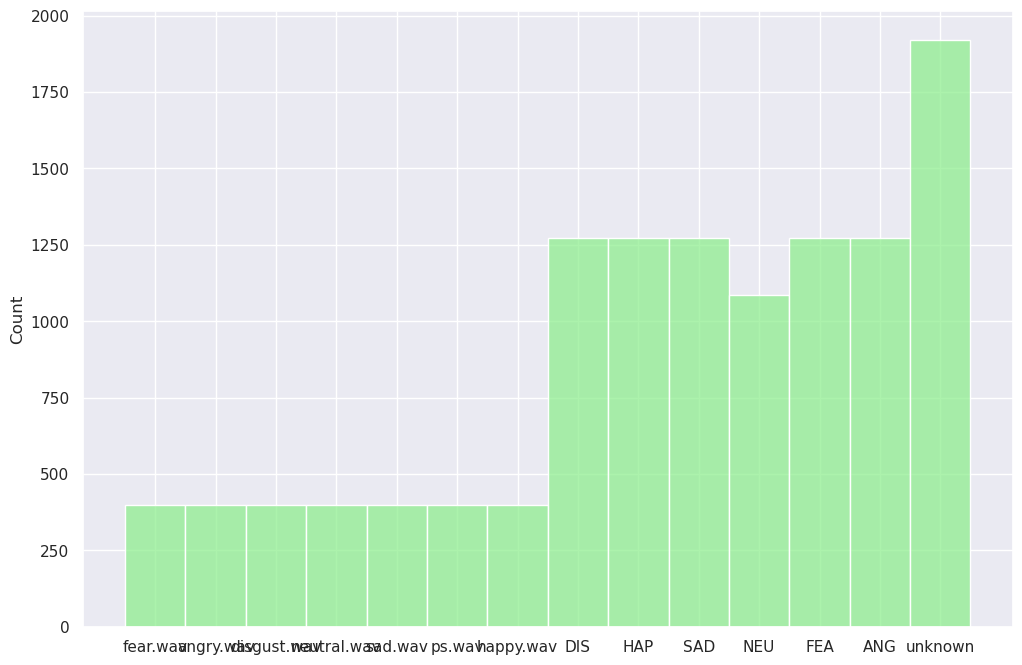

In [8]:
# plot the different types of labels
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='lightgreen')

In [9]:
# load the audio data from multiple files and store in an array
audio_arrays = []

for i in df['Path']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
df['Arrays'] = audio_arrays

In [10]:
# display the new dataframe
df

,Path,Label,Arrays
0,../input/speech-emotion-recognition-en/Tess/YA...,fear.wav,"[0.0011780586, 0.00055705017, -0.00040068073, ..."
1,../input/speech-emotion-recognition-en/Tess/YA...,fear.wav,"[0.0006914375, 0.00061733683, -7.699896e-05, -..."
2,../input/speech-emotion-recognition-en/Tess/YA...,fear.wav,"[-5.1391362e-05, -0.00081389473, -0.0010619429..."
3,../input/speech-emotion-recognition-en/Tess/YA...,fear.wav,"[0.0038201232, 0.0035845842, 7.363991e-05, -0...."
4,../input/speech-emotion-recognition-en/Tess/YA...,fear.wav,"[3.2942142e-05, -1.2481658e-05, -0.00011891677..."
...,...,...,...
12157,../input/speech-emotion-recognition-en/Ravdess...,unknown,"[7.918878e-05, 9.8992045e-05, 8.307225e-05, 0...."
12158,../input/speech-emotion-recognition-en/Ravdess...,unknown,"[9.944476e-14, -8.311862e-14, 2.807851e-13, 8...."
12159,../input/speech-emotion-recognition-en/Ravdess...,unknown,"[-3.8446515e-07, -2.5831987e-06, -0.0001191278..."
12160,../input/speech-emotion-recognition-en/Ravdess...,unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


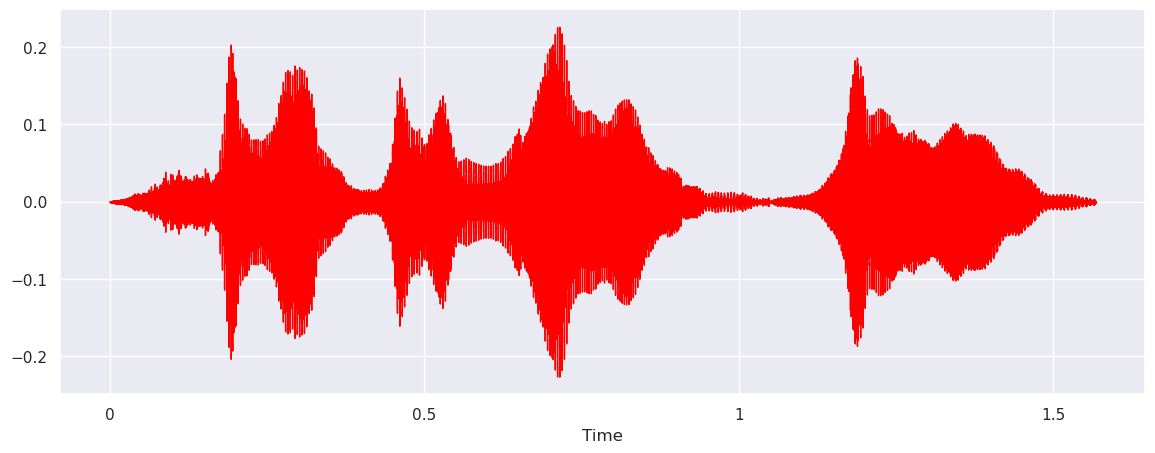

In [11]:
import IPython.display as ipd

# plot the angry audio data from the dataframe
ang_file = df[(df['Label'] == 'angry.wav') | (df['Label'] == 'ANG')]['Path']
ang_array = df[df['Label'] == 'angry.wav']['Arrays']

if not ang_file.empty and not ang_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(ang_array.iloc[0], sr=44100, color='red')
    plt.show()
    ipd.Audio(ang_file.iloc[0])
else:
    print("No audio data found for label angry.wav")

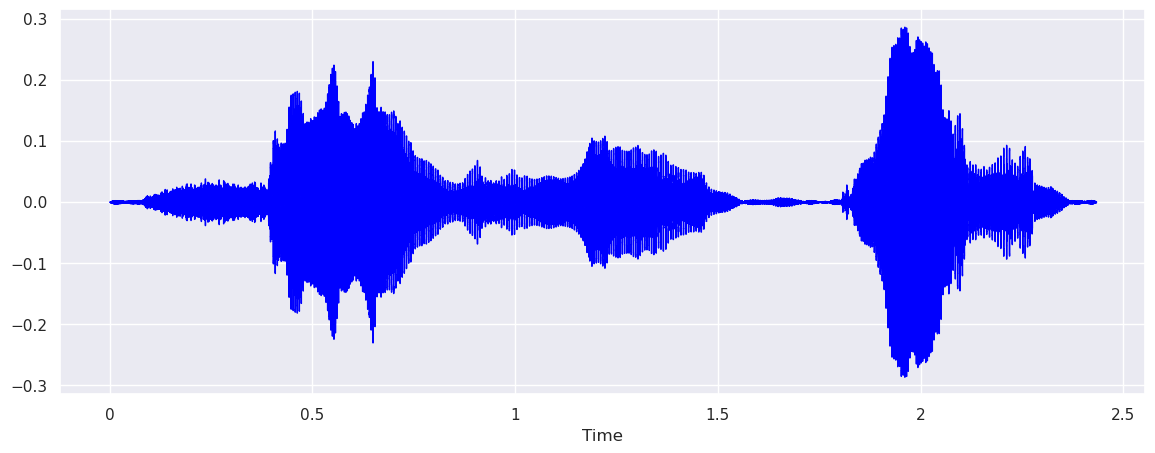

In [12]:
# plot the disgust audio data from the dataframe
dis_file = df[(df['Label'] == 'disgust.wav') | (df['Label'] == 'DIS')]['Path']
dis_array = df[df['Label'] == 'disgust.wav']['Arrays']

if not dis_file.empty and not dis_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(dis_array.iloc[0], sr=44100, color='blue')
    plt.show()
    ipd.Audio(dis_file.iloc[0])
else:
    print("No audio data found for label disgust.wav")

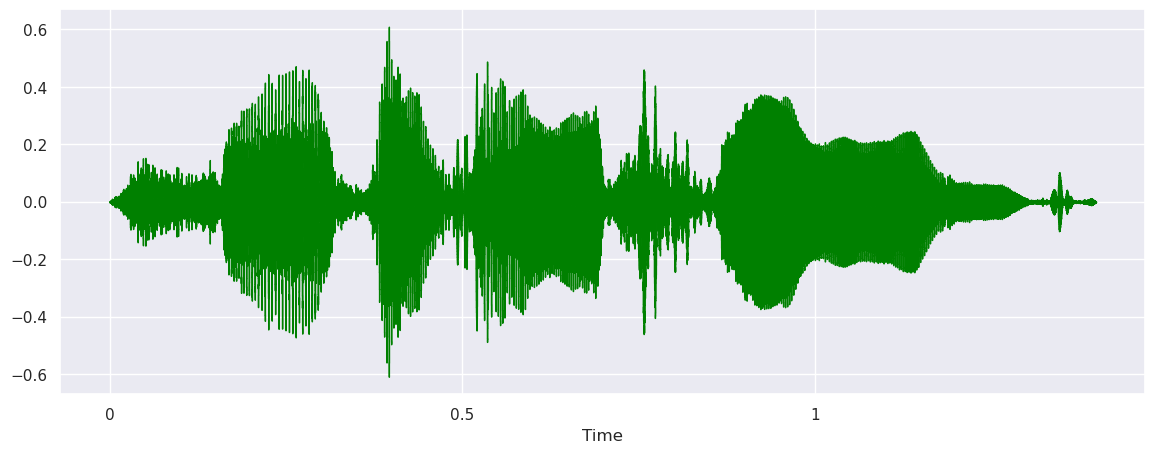

In [13]:
# plot the fear audio data from the dataframe
fear_file = df[(df['Label'] == 'fear.wav')| (df['Label'] == 'FEA')]['Path']
fear_array = df[df['Label'] == 'fear.wav']['Arrays']

if not fear_file.empty and not fear_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(fear_array.iloc[0], sr=44100, color='green')
    plt.show()
    ipd.Audio(fear_file.iloc[0])
else:
    print("No audio data found for label fear.wav")

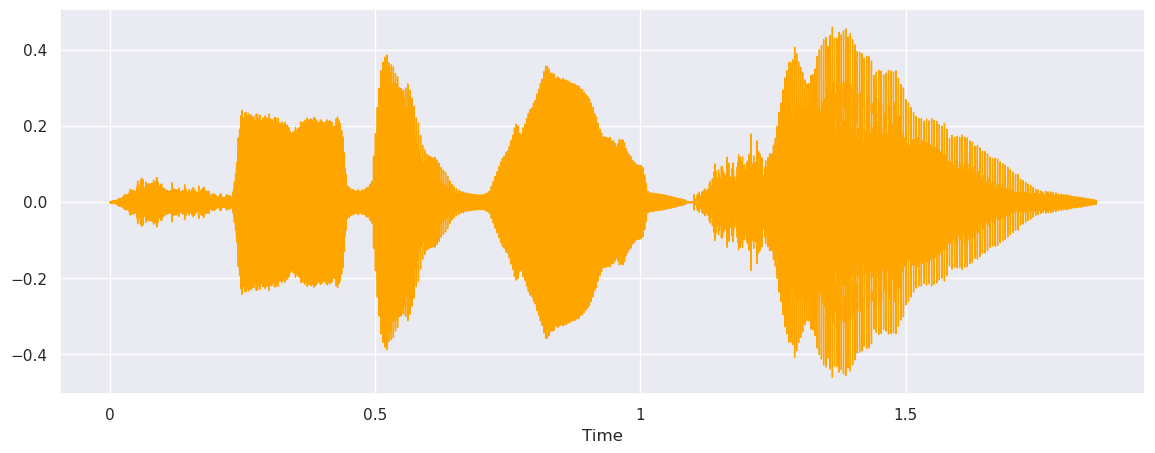

In [14]:
# plot the happy audio data from the dataframe
happy_file = df[(df['Label'] == 'happy.wav')| (df['Label'] == 'HAP')]['Path']
happy_array = df[df['Label'] == 'happy.wav']['Arrays']

if not happy_file.empty and not happy_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(happy_array.iloc[0], sr=44100, color='orange')
    plt.show()
    ipd.Audio(fear_file.iloc[0])
else:
    print("No audio data found for label happy.wav")

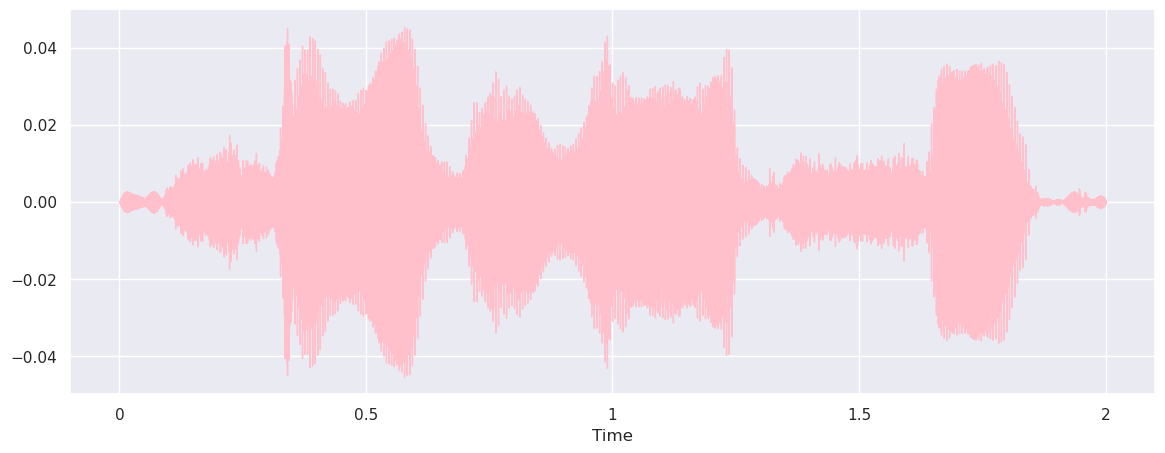

In [15]:
# plot the neutral audio data from the dataframe
neu_file = df[(df['Label'] == 'neutral.wav')| (df['Label'] == 'NEU')]['Path']
neu_array = df[df['Label'] == 'neutral.wav']['Arrays']

if not neu_file.empty and not neu_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(neu_array.iloc[0], sr=44100, color='pink')
    plt.show()
    ipd.Audio(fear_file.iloc[0])
else:
    print("No audio data found for label neutral.wav")

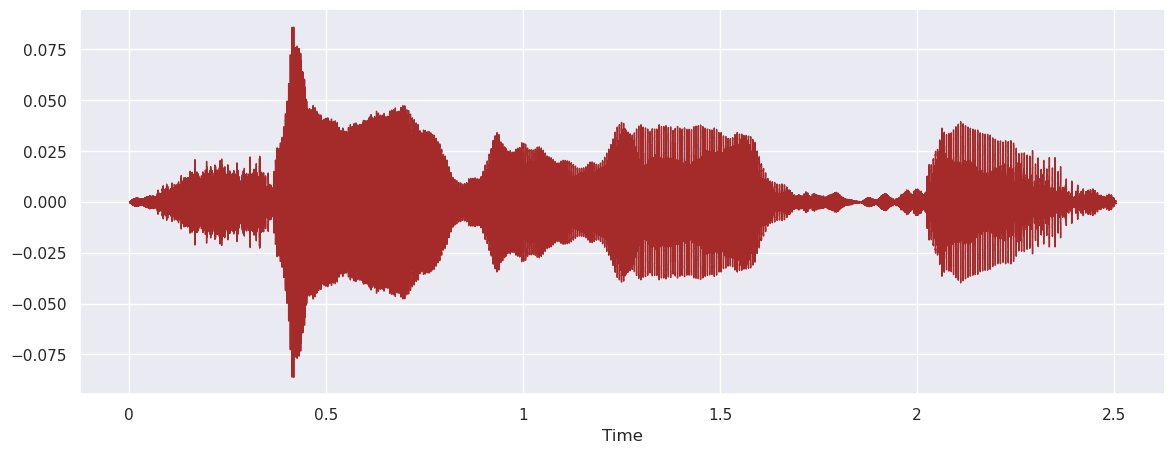

In [16]:
# plot the sad audio data from the dataframe
sad_file = df[(df['Label'] == 'sad.wav')| (df['Label'] == 'SAD')]['Path']
sad_array = df[df['Label'] == 'sad.wav']['Arrays']

if not sad_file.empty and not sad_array.empty:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(sad_array.iloc[0], sr=44100, color='brown')
    plt.show()
    ipd.Audio(fear_file.iloc[0])
else:
    print("No audio data found for label sad.wav")